In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('shop_patterns.csv')
num_cols_names = ['Age', 'Purchase Amount (USD)', 'Review Rating']
cat_cols_names = ['Gender', 'Category', 'Frequency of Purchases']



In [107]:
print(df.head())

   Customer ID   Age Gender  Category  Purchase Amount (USD) Size  Season  \
0            1   NaN   Male  Clothing                   53.0    L  Winter   
1            2  19.0   Male  Clothing                   64.0    L  Winter   
2            3  50.0    NaN  Clothing                   73.0    S  Spring   
3            4  21.0   Male  Footwear                   90.0    M  Spring   
4            5  45.0   Male  Clothing                   49.0    M  Spring   

   Review Rating  Shipping Type Promo Code Used  Previous Purchases  \
0            3.1        Express             Yes                  14   
1            3.1        Express             Yes                   2   
2            3.1  Free Shipping             Yes                  23   
3            3.5   Next Day Air             Yes                  49   
4            NaN  Free Shipping             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash          

In [108]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3120 non-null   float64
 2   Gender                  3510 non-null   object 
 3   Category                3510 non-null   object 
 4   Purchase Amount (USD)   3120 non-null   float64
 5   Size                    3900 non-null   object 
 6   Season                  3900 non-null   object 
 7   Review Rating           3120 non-null   float64
 8   Shipping Type           3900 non-null   object 
 9   Promo Code Used         3900 non-null   object 
 10  Previous Purchases      3900 non-null   int64  
 11  Payment Method          3900 non-null   object 
 12  Frequency of Purchases  3510 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 396.2+ KB
None


In [109]:
print(df.describe())

       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3120.000000            3120.000000    3120.000000   
mean   1950.500000    44.127885              59.919551       3.744519   
std    1125.977353    15.243329              23.696562       0.721854   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [110]:
print(df.shape)

(3900, 13)


In [111]:
nuller = df.isnull().sum()
print(nuller)

Customer ID                 0
Age                       780
Gender                    390
Category                  390
Purchase Amount (USD)     780
Size                        0
Season                      0
Review Rating             780
Shipping Type               0
Promo Code Used             0
Previous Purchases          0
Payment Method              0
Frequency of Purchases    390
dtype: int64


In [112]:
# How many values are missing, should we drop empty columns or fill them instead?
total = len(df)
print('==============================================================')
for col in num_cols_names:
      
    missing_cols = df[col].isnull().sum()
    print(f"Missing {col}: {missing_cols} / {total} ({missing_cols/total:.2%})")
    df_drop_col = df.dropna(subset=[col]).reset_index(drop=True)
    print("After drop:", df_drop_col.shape)
    
df_drop_any = df.dropna().reset_index(drop=True)
print("After drop any empty row:", df_drop_any.shape)

Missing Age: 780 / 3900 (20.00%)
After drop: (3120, 13)
Missing Purchase Amount (USD): 780 / 3900 (20.00%)
After drop: (3120, 13)
Missing Review Rating: 780 / 3900 (20.00%)
After drop: (3120, 13)
After drop any empty row: (1465, 13)


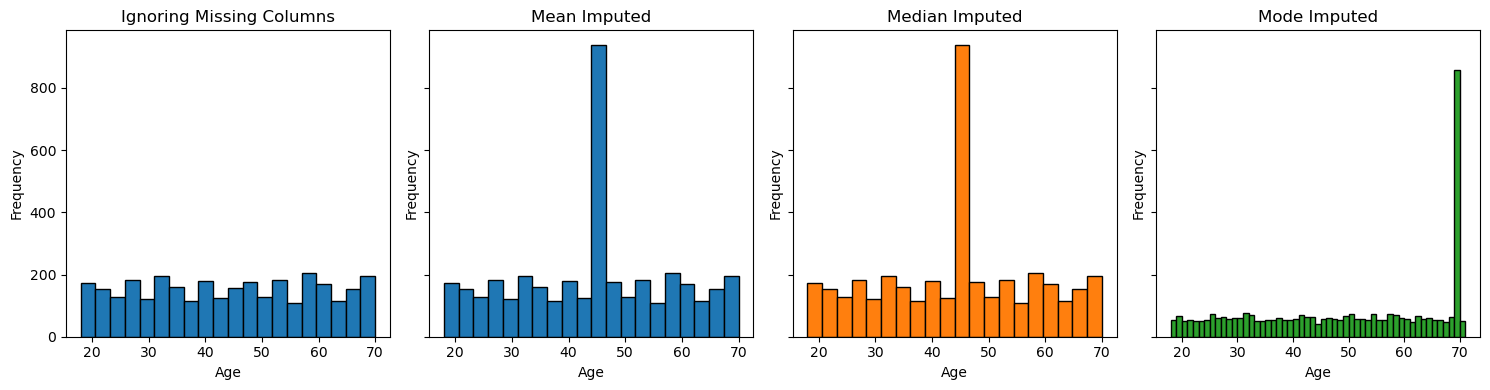

In [113]:
mean = df['Age'].mean()
median = df['Age'].median()
mode = df['Age'].mode()[0]

age_mean = df['Age'].fillna(mean)
age_median = df['Age'].fillna(median)
age_mode = df['Age'].fillna(mode)

age = df['Age']

fig, axes = plt.subplots(1,4, figsize=(15,4), sharey=True)
axes[0].hist(age, bins=20, color='C0', edgecolor='k'); axes[0].set_title('Ignoring Missing Columns')
axes[1].hist(age_mean, bins=20, color='C0', edgecolor='k'); axes[1].set_title('Mean Imputed')
axes[2].hist(age_median, bins=20, color='C1', edgecolor='k'); axes[2].set_title('Median Imputed')
axes[3].hist(age_mode, bins=range(int(df['Age'].min()), int(df['Age'].max())+2), color='C2', edgecolor='k'); axes[3].set_title('Mode Imputed')
for ax in axes: ax.set_xlabel('Age'); ax.set_ylabel('Frequency')
plt.tight_layout(); plt.show()

# shows which option is the best 

In [114]:
test = df['Age'].value_counts().head(5)
print(test)

Age
69.0    77
31.0    76
57.0    74
25.0    74
54.0    73
Name: count, dtype: int64


In [115]:

print(f'data length: {len(df)}')
for col in num_cols_names:
    print(f'Mode value: {col}: {df[col].mode()[0]}')
    print(f"{col} counts: {df[col].value_counts().max()}") # to know the max frequency of a value in each numerical column ( whether it is suitable for mode imputation)
    print('==============================================================')

data length: 3900
Mode value: Age: 69.0
Age counts: 77
Mode value: Purchase Amount (USD): 36.0
Purchase Amount (USD) counts: 56
Mode value: Review Rating: 3.4
Review Rating counts: 146


In [116]:

print('==============================================================')
# numerical columns 
for col in num_cols_names:
    mode = df[col].mode()[0]  # extract scalar
    df[col] = df[col].fillna(mode).astype(int)
    # why did i choose the mode? it makes no changes to the data since its already the most frequent value 

# categorical columns
missing_cols = {
    'Gender': 'Unknown_Gender',
    'Category': 'Other',
    'Frequency of Purchases': 'Unknown_Frequency'
}

for col in cat_cols_names:
    df[col] = df[col].fillna(missing_cols[col])
    


In [117]:
print(df.isnull().sum())

print(df.shape)

Customer ID               0
Age                       0
Gender                    0
Category                  0
Purchase Amount (USD)     0
Size                      0
Season                    0
Review Rating             0
Shipping Type             0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64
(3900, 13)


---------------------------------------------------------------------------------------------------------------------------------
Caterogical Analysis :


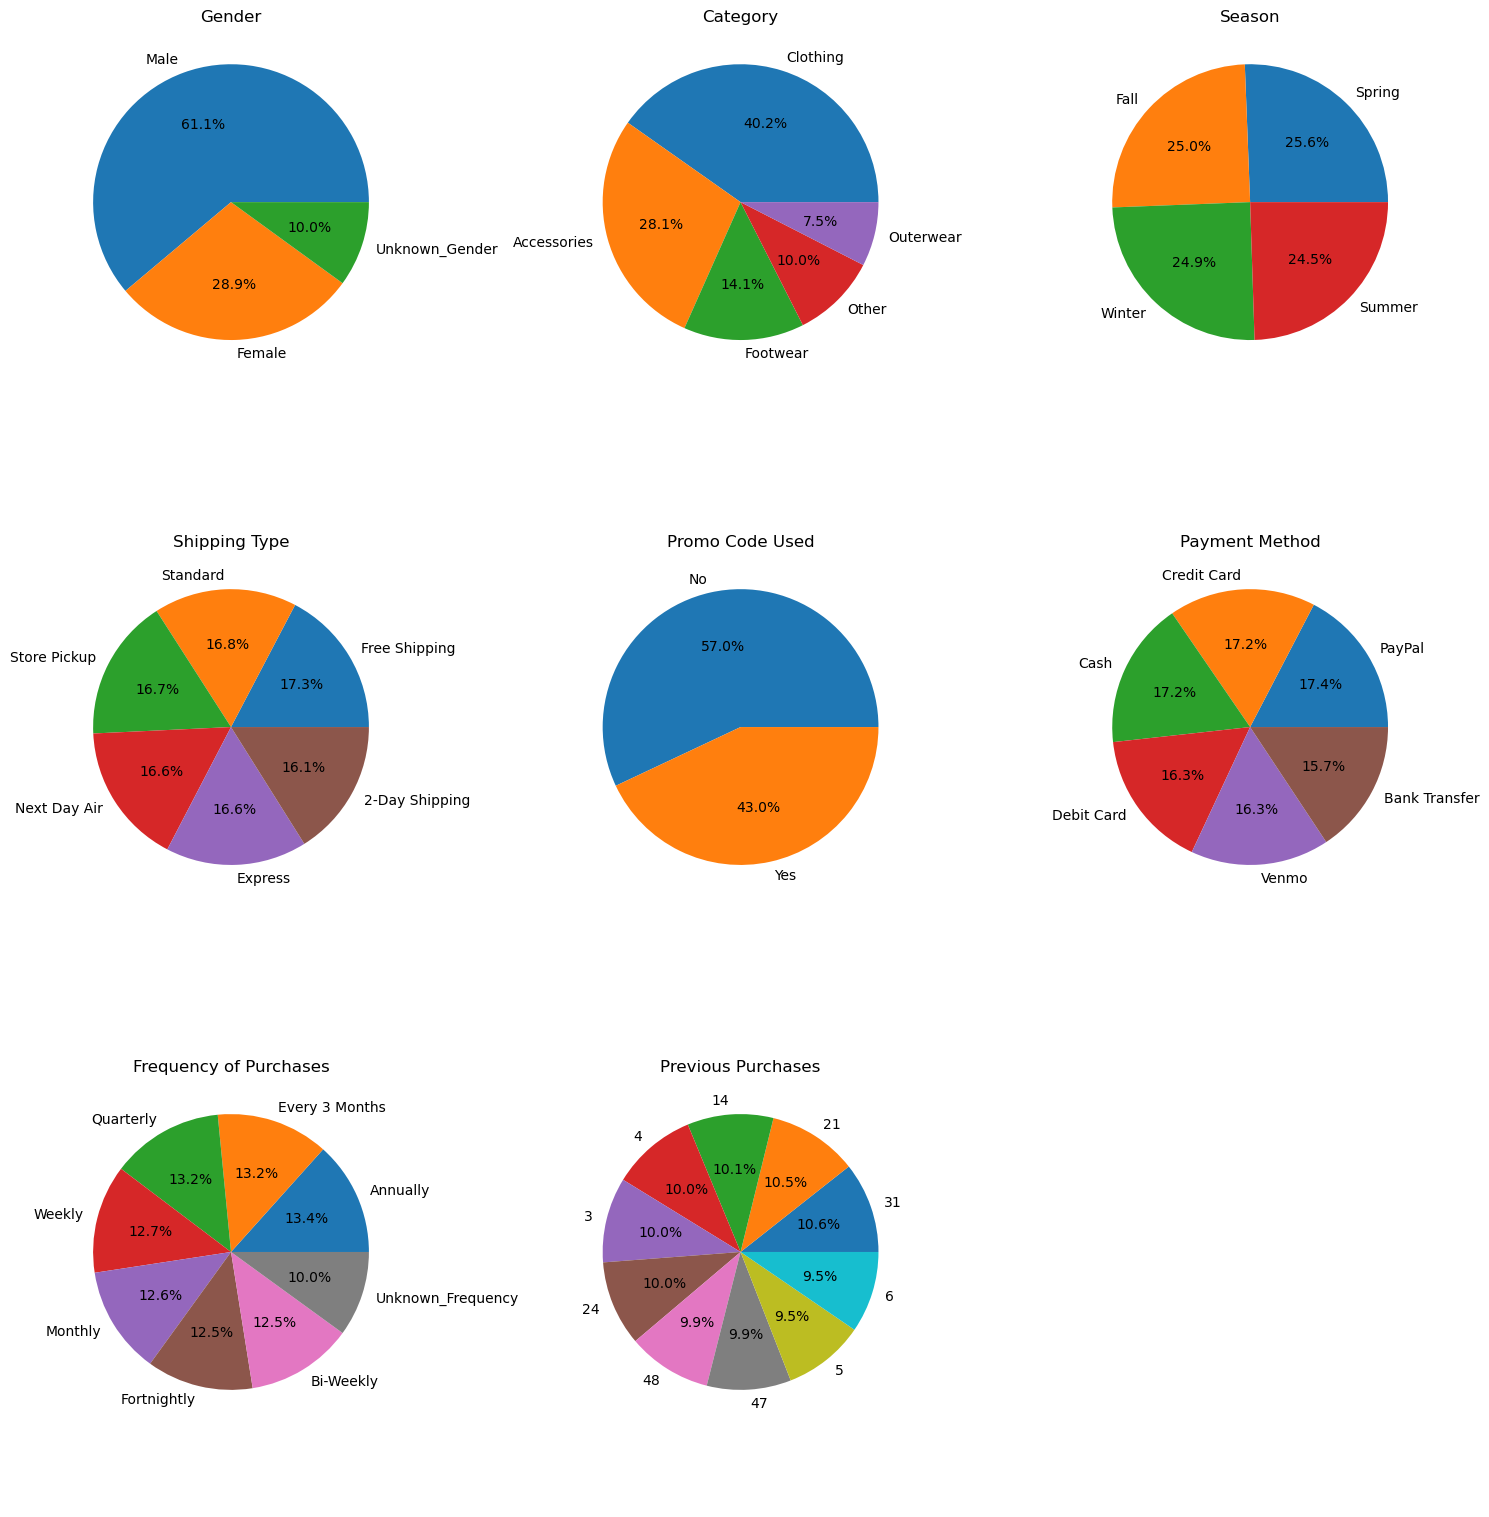

---------------------------------------------------------------------------------------------------------------------------------


In [118]:
print('---------------------------------------------------------------------------------------------------------------------------------')
print('Caterogical Analysis :')


categorical_cols = ['Gender', 'Category', 'Season', 'Shipping Type', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases', 'Previous Purchases']

fig, axes = plt.subplots(3, 3, figsize=(15, 16))

axes = axes.flatten() 

for i, col in enumerate(categorical_cols):
    pl = df[col].value_counts()
    if len(pl) > 10:
        pl = pl.head(10)
        
    axes[i].pie(
        pl.values,
        labels=pl.index,
        autopct='%1.1f%%'
    )
    axes[i].set_title(f'{col}', fontsize=12)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
print('---------------------------------------------------------------------------------------------------------------------------------')

Numerical Analysis :


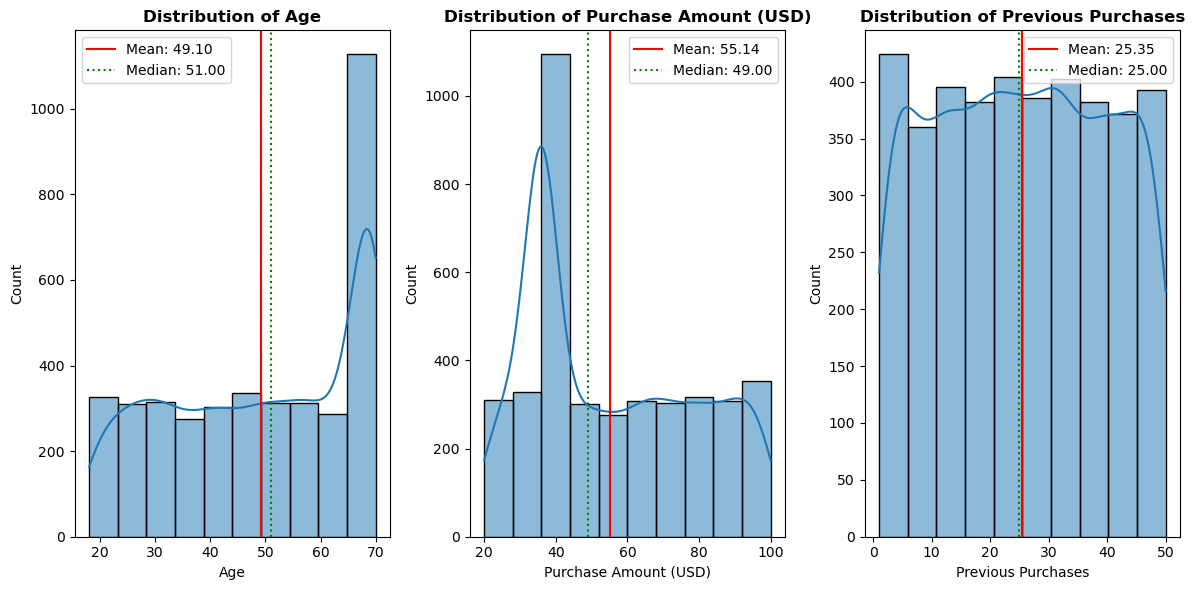

In [119]:
print('Numerical Analysis :')

fig, axes= plt.subplots(1, 3, figsize=(12,6))
axes = axes.ravel()

nums = ['Age', 'Purchase Amount (USD)', 'Previous Purchases']

for i, col in enumerate(nums):

    sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=10, element='bars')
    axes[i].set_title(f'Distribution of {col}', fontweight='bold')
    axes[i].axvline(df[col].mean(), color='red', linestyle='-', label=f'Mean: {df[col].mean():.2f}')
    axes[i].axvline(df[col].median(), color='green', linestyle=':', label=f'Median: {df[col].median():.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()


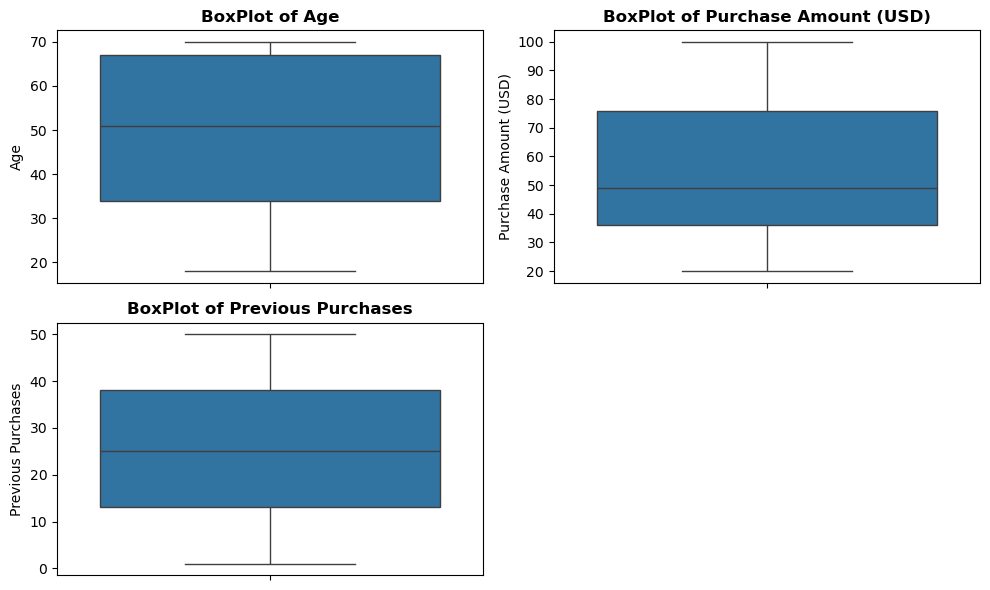

In [120]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes = axes.flatten()

for i, col in enumerate(nums):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'BoxPlot of {col}', fontweight='bold')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

      Category  Purchase Amount (USD)
0  Accessories                  61227
1     Clothing                  86640
2     Footwear                  30360
3        Other                  21257
4    Outerwear                  15545


C:\Users\PC\AppData\Local\Temp\ipykernel_14464\2177614208.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purchase_by_category, x='Category', y='Purchase Amount (USD)', palette='viridis')


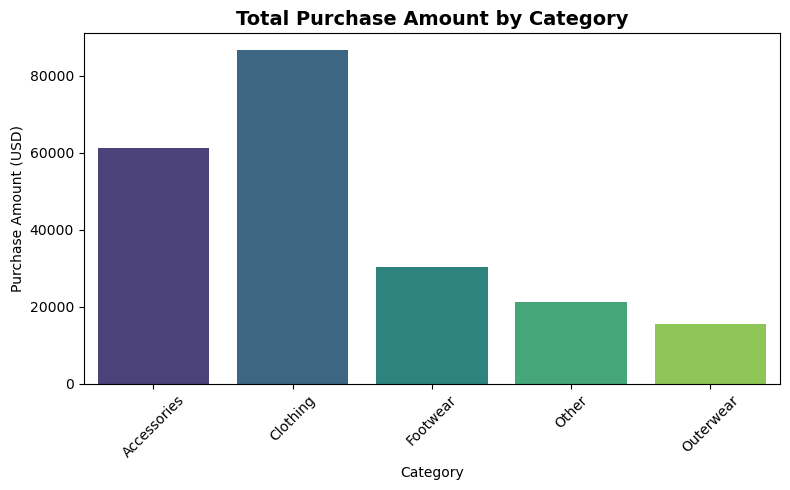

In [121]:
#  Purchase Amount by Category

purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
print(purchase_by_category)
plt.figure(figsize=(8, 5))
sns.barplot(data=purchase_by_category, x='Category', y='Purchase Amount (USD)', palette='viridis')
plt.title('Total Purchase Amount by Category', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Frequency of Purchases by Gender')

<Figure size 800x500 with 0 Axes>

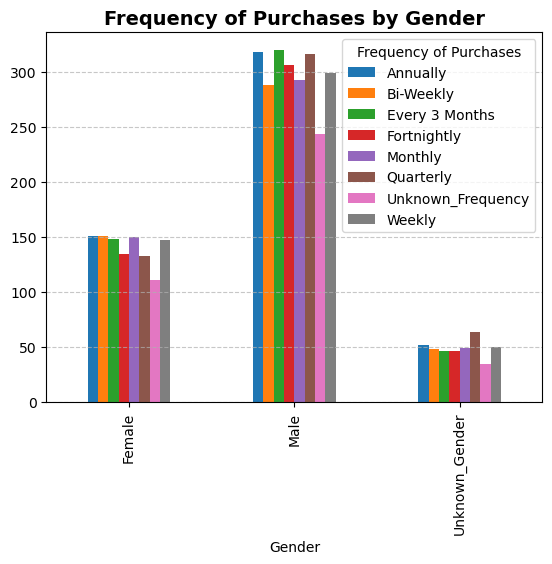

In [122]:
fq_purchase_gender = df.groupby('Gender')['Frequency of Purchases'].value_counts().unstack()

plt.figure(figsize=(8, 5))
fq_purchase_gender.plot(kind='bar')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Frequency of Purchases by Gender', fontweight='bold', fontsize=14)


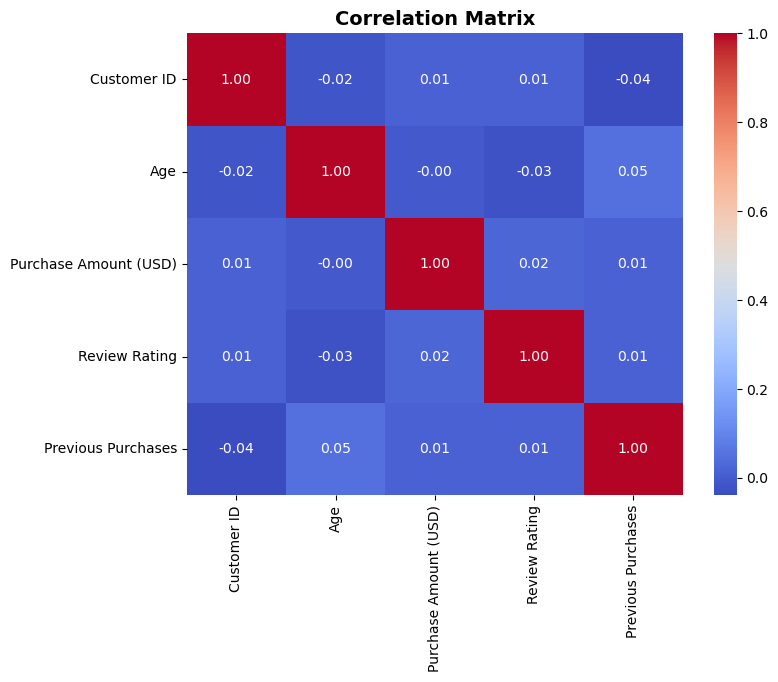

In [123]:

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontweight='bold', fontsize=14)
plt.show()

In [124]:
print(df['Frequency of Purchases'].value_counts().reset_index())

loyal = ['Weekly', 'Fortnightly', 'Bi-weekly', 'Unknown_Frequency']
not_loyal = ['Annually', 'Every 3 Months', 'Quarterly', 'Monthly']

# Yes = spends very often ; No = barely spends
df['Frequent Spender'] = np.where(
    df['Frequency of Purchases'].isin(loyal), 
    'Yes', 
    'No'
)

print(df['Frequent Spender'].head(5))

  Frequency of Purchases  count
0               Annually    521
1         Every 3 Months    514
2              Quarterly    513
3                 Weekly    496
4                Monthly    492
5            Fortnightly    487
6              Bi-Weekly    487
7      Unknown_Frequency    390
0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: Frequent Spender, dtype: object


In [125]:

# Create new features
df['Spending Power'] = np.where(df['Purchase Amount (USD)'] > df['Purchase Amount (USD)'].mean(), 'High spender', 'Low spender')
df['Discount Next Purchase'] = np.where(df['Spending Power'] == 'High spender', 'Eligible for Discount', 'not Eligible for Discount')
df['Satisfaction'] = np.where(df['Review Rating'] >= 4, 'Positive Review', 'Negative Review')

print(df['Spending Power'].head())
print(df['Discount Next Purchase'].head(5))
print(df['Satisfaction'].head())

0     Low spender
1    High spender
2    High spender
3    High spender
4     Low spender
Name: Spending Power, dtype: object
0    not Eligible for Discount
1        Eligible for Discount
2        Eligible for Discount
3        Eligible for Discount
4    not Eligible for Discount
Name: Discount Next Purchase, dtype: object
0    Negative Review
1    Negative Review
2    Negative Review
3    Negative Review
4    Negative Review
Name: Satisfaction, dtype: object


In [126]:
#save claned data
df.to_csv('shop_patterns_cleaned.csv', index=False)